## Martin Dionne

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.optimize as opt

# 1. Bisection


One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where:

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  

And so on.

This is bisection, a relative of [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm). It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $. 

Write an implementation of the bisection algorith, `bisect(f, lower, upper, tol)` which, given a function `f`, a lower bound `lower` and an upper bound `upper` finds the point `x` where `f(x) = 0`. The parameter `tol` is a numerical tolerance, you should stop once your step size is smaller than `tol`.


Use it to minimize the function:

$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

in python: `lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1`

The value where f(x) = 0 should be around `0.408`

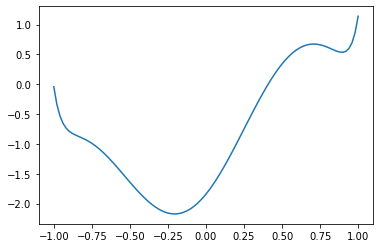

In [2]:
x = np.linspace(-1,1,100)
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
plt.plot(x, f(x))

In [3]:
def bisect(f, lower, upper, tol):
    x = (upper + lower) / 2
    if np.abs(f(x)) > tol:
        if f(x) > 0 : 
            upper = x 
        else: 
            lower = x
        return bisect(f, lower, upper, tol)
    return x

In [4]:
bisect(f, -1, 1, 0.001) # 0.408

0.408203125

In [5]:
# verification
opt.bisect(f, -1, 1)

0.4082935042806639

# 1.2 (stretch) Recursive Bisect

Write a recursive version of the bisection algorithm

In [6]:
bisect(f, -1, 1, 0.001) # 0.408

0.408203125

# 2.1 Movies Regression

Write the best linear regression model you can on the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv) to predict the profitability of a movie (revenue - budget). Maintain the interpretability of the model.

Few notes:

1. Clean your data! Movies where the budget or revenue are invalid should be thrown out

2. Be creative with feature engineering. You can include processing to one-hot encode the type of movie, etc.

3. The model should be useful for someone **who is thinking about making a movie**. So features like the popularity can't be used. You could, however, use the ratings to figure out if making "good" or "oscar bait" movies is a profitable strategy.

In [7]:
df = pd.read_csv('data/movies_metadata.csv')

# drop rows of Unreleased movies
df = df[df.status == 'Released']

# drop columns unique to the row
df = df.drop(columns=['id', 'imdb_id', 'original_title', 'overview', 'poster_path', 'tagline', 'title', 'status'])

# covert to boolean
df['adult'] = df['adult'].replace(('False', 'True'), (0,1))
df['belongs_to_collection'] = df['belongs_to_collection'].notna().replace((False, True), (0,1))
df['homepage'] = df['homepage'].notna().replace((False, True), (0,1))
df['video'] = df['video'].replace((False, True), (0,1))

# covert to date
df['release_date'] = pd.to_datetime(df['release_date'], format = '%Y-%m-%d', errors='coerce')
df['day'] = df['release_date'].dt.day
df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year

# drop features correlated to the popularity (after the fact)
df = df.drop(columns=['popularity', 'vote_average', 'vote_count', 'release_date', 'day'])

# fix revenue = 0, NaN budget = 0
df['budget'] = df['budget'].astype('int')
df.loc[df['budget'] == 0, 'budget'] = np.nan
df.loc[df['revenue'] == 0, 'revenue'] = np.nan

na = df.isnull().sum().to_frame(name = 'na')
na = na.loc[na.na != 0]
na

df = df.dropna()
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,original_language,production_companies,production_countries,revenue,runtime,spoken_languages,video,month,year
0,0,1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1,en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",0,10.0,1995.0
1,0,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0,en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",0,12.0,1995.0
3,0,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,en,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",0,12.0,1995.0
5,0,0,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",0,en,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",0,12.0,1995.0
8,0,0,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",0,en,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",0,12.0,1995.0


In [8]:
# drop columns non numerical columns (for now)
#df = df.drop(columns=['genres', 'production_companies' , 'production_countries', 'spoken_languages'])
df = df.drop(columns=['production_companies', 'production_countries', 'spoken_languages'])

json_features = ['genres']
#if 'json_featuresif' in locals():
for f in json_features:
    df[f] = (df[f]
        .apply(eval)
        .apply(lambda row : [d['name'] for d in row])
        .astype(str)
        .apply(eval)
        )

for f in json_features:
    df = df.join(pd.get_dummies(df[f].apply(pd.Series), prefix=f, prefix_sep="_", drop_first=True)).drop(columns=[f])

df = df.join(pd.get_dummies(df['original_language'].apply(pd.Series), prefix='original_language', prefix_sep="_", drop_first=True)).drop(columns=['original_language'])

In [9]:
# drop columns containing only zeros
df = df.drop(columns=['adult', 'video'])
# sum columns if they have a duplicate name
df = df.groupby(df.columns, axis=1).sum() 
# drop columns with less than 50 meaninfull entries
df = df[df.columns[df.sum()>50]]
#df.sum()
#df.info()

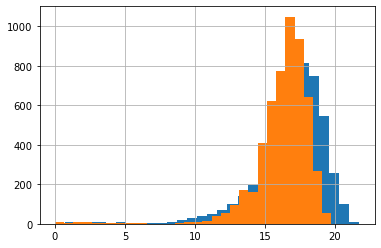

In [10]:
np.log(df['revenue']).hist(bins=30)
df['revenue'] = np.log(df['revenue'])
np.log(df['budget']).hist(bins=30)
df['budget']= np.log(df['budget'])

In [11]:
y = df['revenue']
X = sm.add_constant(df.drop(columns='revenue'))

est = sm.OLS(y, X).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     142.1
Date:                Fri, 05 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:32:38   Log-Likelihood:                -10599.
No. Observations:                5376   AIC:                         2.125e+04
Df Residuals:                    5348   BIC:                         2.144e+04
Df Model:                          27                                         
Covariance Type:                  HC2                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     40.7531      4.441      9.177      0.000      32.049      49.457
belongs_to_collection      1.0669      0.054     19.725      0.000       0.961       1.173
budget                     0.8475      0.033     25.972      0.000       0.784       0.912
genres_Adventure          -0.0333      0.067     -0.498      0.619      -0.164       0.098
genres_Animation           0.2884      0.103      2.797      0.005       0.086       0.490
genres_Comedy              0.1403      0.065      2.143      0.032       0.012       0.269
genres_Crime              -0.0052      0.074     -0.071      0.943      -0.149       0.139
genres_Documentary         0.0256      0.370      0.069      0.945      -0.700       0.751
genres_Drama              -0.2302      0.064     -3.580      0.000      -0.356      -0.104
genres_Family              0.2532      0.087      2.921      0.003       0.083       0.423
genres_Fantasy            -0.0560      0.072     -0.776      0.438      -0.197       0.085
genres_History            -0.0886      0.135     -0.657      0.511      -0.353       0.176
genres_Horror              0.1720      0.090      1.902      0.057      -0.005       0.349
genres_Music              -0.1376      0.137     -1.004      0.315      -0.406       0.131
genres_Mystery            -0.0223      0.087     -0.258      0.797      -0.192       0.148
genres_Romance             0.0998      0.073      1.371      0.170      -0.043       0.242
genres_Science Fiction    -0.1625      0.074     -2.202      0.028      -0.307      -0.018
genres_Thriller           -0.0614      0.065     -0.948      0.343      -0.188       0.066
genres_War                -0.0815      0.145     -0.563      0.574      -0.365       0.202
genres_Western            -0.4932      0.199     -2.480      0.013      -0.883      -0.103
homepage                   0.4698      0.058      8.045      0.000       0.355       0.584
month                      0.0063      0.007      0.856      0.392      -0.008       0.021
original_language_en       0.0921      0.136      0.675      0.500      -0.175       0.359
original_language_fr      -0.8917      0.252     -3.533      0.000      -1.386      -0.397
original_language_hi       0.2362      0.182      1.301      0.193      -0.120       0.592
original_language_ru      -0.4432      0.257     -1.723      0.085      -0.948       0.061
runtime                    0.0129      0.002      7.507      0.000       0.010       0.016
year                      -0.0198      0.002     -8.549      0.000      -0.024      -0.015
==============================================================================
Omnibus:                     2091.599   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33171.170
Skew:                    

In [12]:
dropcol = (est.pvalues >= 0.05)
dropcol = dropcol[dropcol==True].index
X2 = X.drop(columns=dropcol)
est2 = sm.OLS(y,sm.add_constant(X2)).fit(cov_type='HC2')
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     276.4
Date:                Fri, 05 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:32:39   Log-Likelihood:                -10609.
No. Observations:                5376   AIC:                         2.124e+04
Df Residuals:                    5363   BIC:                         2.133e+04
Df Model:                          12                                         
Covariance Type:                  HC2                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     41.7917      3.859     10.830      0.000      34.228      49.355
belongs_to_collection      1.0640      0.053     20.180      0.000       0.961       1.167
budget                     0.8446      0.029     29.493      0.000       0.788       0.901
genres_Animation           0.2520      0.099      2.541      0.011       0.058       0.446
genres_Comedy              0.1650      0.057      2.905      0.004       0.054       0.276
genres_Drama              -0.2260      0.060     -3.738      0.000      -0.345      -0.108
genres_Family              0.2378      0.086      2.767      0.006       0.069       0.406
genres_Science Fiction    -0.1610      0.071     -2.270      0.023      -0.300      -0.022
genres_Western            -0.5106      0.196     -2.599      0.009      -0.896      -0.126
homepage                   0.4776      0.058      8.250      0.000       0.364       0.591
original_language_fr      -0.9739      0.221     -4.401      0.000      -1.408      -0.540
runtime                    0.0127      0.001      8.466      0.000       0.010       0.016
year                      -0.0203      0.002    -10.034      0.000      -0.024      -0.016
==============================================================================
Omnibus:                     2093.086   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32944.941
Skew:                          -1.434   Prob(JB):                         0.00
Kurtosis:                      14.783   Cond. No.                     2.82e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2.2 Movies Manual Regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using the normal equation $(X^T X)^{-1}X^Ty$.

Verify that the coefficients are the same.

In [13]:
# Returns array with [intercept, slope]
Xc = sm.add_constant(X2.copy())

beta = np.linalg.inv(Xc.T @ Xc) @ Xc.T @ y
beta

0     41.791691
1      1.064022
2      0.844560
3      0.252035
4      0.164996
5     -0.226005
6      0.237782
7     -0.161045
8     -0.510614
9      0.477617
10    -0.973928
11     0.012652
12    -0.020268
dtype: float64

In [14]:
est2.params

const                     41.791691
belongs_to_collection      1.064022
budget                     0.844560
genres_Animation           0.252035
genres_Comedy              0.164996
genres_Drama              -0.226005
genres_Family              0.237782
genres_Science Fiction    -0.161045
genres_Western            -0.510614
homepage                   0.477617
original_language_fr      -0.973928
runtime                    0.012652
year                      -0.020268
dtype: float64

# 2.3 Movies gradient descent regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using **gradient descent**. 

Hint: use `scipy.optimize` and remember we're finding the $\beta$ that minimizes the squared loss function of linear regression: $f(\beta) = (\beta X - y)^2$. This will look like part 3 of this lecture.

Verify your coefficients are similar to the ones in 2.1 and 2.2. They won't necessarily be exactly the same, but should be roughly similar.

In [15]:
def GradientDescent(betas, y, x):
    sq_loss = np.sum( (np.dot(x, betas) - y) ** 2 )
    return sq_loss

In [16]:
from scipy.optimize import minimize
from sklearn import preprocessing 
mm_scaler = preprocessing.MinMaxScaler()


# get x values with constant
y = df['revenue']
x = sm.add_constant(df.drop(columns='revenue'))

#create beta hat vector to maximize on (initiatlized with zeros)
#betas = np.random.rand(np.shape(x)[1])
betas = np.zeros(np.shape(x)[1])

#dg_est = minimize(GradientDescent, betas, args=(y,x), method='bfgs')
#dg_est = minimize(GradientDescent, betas, args=(y,x), method='nelder-mead')
#dg_est = minimize(GradientDescent, betas, args=(y,mm_scaler.fit_transform(x)), method='powell')
dg_est = minimize(GradientDescent, betas, args=(y,x), method='powell')


#print vector of maximized betahats
dg_est['x']

array([ 7.45123920e+00,  1.11895520e+00,  8.05377500e-01, -3.69433850e-03,
        3.44592308e-01,  1.07446922e-01,  1.15603558e-02, -9.60325986e-02,
       -2.50996045e-01,  2.63320308e-01, -4.22874906e-02, -5.35628896e-02,
        1.60245976e-01, -4.71046356e-02,  1.33384346e-02,  1.30203492e-01,
       -1.28120334e-01, -1.03778526e-01, -1.20671193e-02, -3.05728855e-01,
        2.72716616e-01,  8.85586250e-03,  2.40678742e-01, -8.54100957e-01,
        9.04730266e-02, -5.50612227e-01,  1.47415915e-02, -2.99356331e-03])

In [17]:
# compared to 
est2.params

const                     41.791691
belongs_to_collection      1.064022
budget                     0.844560
genres_Animation           0.252035
genres_Comedy              0.164996
genres_Drama              -0.226005
genres_Family              0.237782
genres_Science Fiction    -0.161045
genres_Western            -0.510614
homepage                   0.477617
original_language_fr      -0.973928
runtime                    0.012652
year                      -0.020268
dtype: float64

In [18]:
# I tought the difference in coefs was due to a local minimum
# but even with scaling the beta values where off
# Powell model gave the closest results